# SVM

Las máquinas de vectores de soporte fueron inventadas por Vladimir Vapnik en la década de 1990. Fueron los mejores clasificadores de su tiempo, pero aunque ahora se encuentran superados por gradient boosted trees y las redes neuronales, se siguien usando por su practicidad y rapidez.

Hay tres clasificadores diferentes pero muy relacionados, que ayudan progresivamente a entender el concepto de las SVM:

- El clasificador del margen máximo
- El clasificador mediante vectores de soporte
- Las máquinas de vectores de soporte

# Clasificador del margen máximo

Es definido por el hiperplano óptimo que separa las clases.
Un **hiperplano** en un espacio dimensional $p$ (descriptores), se define como una superficie "plana" de dimensión $p-1$. Por ejemplo, el hiperplano de el espacio bidimensional es una recta, el hiperplano de un espacio tridimensional es un plano. La definición matemática en $p$ dimensiones es: $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$. Este hiperplano divide el espacio en dos partes.

### Cuando los datos son linealmente separables
El ejemplo más sencillo es considerar datos bidimensionales perfectamente separables de forma lineal. Aquí el hiperplano es una línea recta. 

<img src="images/Diapositiva6.PNG" style="float: left; width: 48%; margin-right: 0%; margin-bottom: 0.5em;">
<img src="images/Diapositiva8.PNG" style="float: right; width: 48%; margin-right: 2%; margin-bottom: 0.5em;">
<p style="clear: both;">

En ese caso, se pueden dibujar muchas líneas diferentes para separar los datos. Para simplificar el problema se puede considerar que $y$ sea $-1$ para una clase y $1$ para la otra. Si $ \beta_0 + \beta_1 X_1 + ... + \beta_p X_p> 0 $ se clasifica la observación como 1 y si $ \beta_0 + \beta_1 X_1 + ... + \beta_p X_p <0 $ se clasifica como -1.

Multiplicando ambas (in)ecuaciones por $y$ se obtiene una sola expresión que define la correcta clasificación para cualquier observación: $ y(\beta_0 + \beta_1 X_1 + ... + \beta_p X_p)> 0 $.

Si los datos son perfectamente separables, existirá un número infinito de hiperplanos que pueden separar perfectamente los datos. Una opción natural es elegir un hiperplano que maximice la distancia de cada observación al hiperplano, es decir, que tenga un margen grande: el margen máximo. Este margen también se puede ver como una "calle" que es definida como la separación máxima entre dos datos de diferentes clases, en donde el hiperplano se encuentra a la mitad de esta calle.

En el caso linealmente separable (bidimensional), se puede encontrar la línea que tiene el margen máximo entre las dos clases. El margen máximo se define como la distancia del punto más cercano al hiperplano de separación. Entonces, se está maximizando la distancia mínima al hiperplano. Todos los demás puntos no tienen consecuencias, lo cúal es realmente sorprendente, pero funciona bien. Estos puntos con mínima distancia al hiperplano se llaman **vectores de soporte**.

# El clasificador mediante vectores de soporte

Si los datos no son separables linealmente, entonces ningún hiperplano puede separar los datos y, por lo tanto, no puede existir margen. Este caso es más común con datos reales. Por otro lado, el clasificador del margen máximo es muy sensible a los puntos de datos individuales. El hiperplano óptimo puede cambiar drásticamente con la adición de un nuevo punto de datos. Para ayudar a combatir este tipo de sobreajuste y para permitir la clasificación no separable, se puede usar un *margen suave*. Este suavizado permite que algunos datos estén dentro del margen (posición incorrecta respecto al margen) o en el lado incorrecto del hiperplano. Esta violación del margen hace que el margen sea "suave".

De esta forma, la formulación del problema se ajusta de manera que una cantidad total de error es permitida. Este error total actúa como una reserva, como un *presupuesto*, que se puede gastar en la suma de errores individuales (por cada dato) que se pueden generar. Estos errores individuales se llaman variables de holgura (*slack variables*). C es un hiperparámetro que es inversamente proporcional a este presupuesto y se elige mediante validación cruzada. Entre más grande es el valor de C más angosto es el margen, entre más pequeño es el valor de C más ancho es el margen.

<img src="images/Diapositiva13.PNG" style="float: left; width: 48%; margin-right: 0%; margin-bottom: 0.5em;">
<img src="images/Diapositiva15.PNG" style="float: right; width: 48%; margin-right: 2%; margin-bottom: 0.5em;">
<p style="clear: both;">

# La máquina de vectores de soporte (SVM)

Para los datos que tienen un "hiperplano" de separación no lineal, se debe hacer algo diferente. Se pueden transformar las variables de forma cuadrática, cúbica (en general, de forma polinomial), crear términos de interacción, etc. o se puede usar *kernels*. La máquina de vectores de soporte puede ampliar el espacio de descriptores (o predictores) sin realizar estas transformaciones manera directa, sino de forma implícita mediante el calculo de las funciones kernel.

<img src="images/Diapositiva17.PNG" style="float: left; width: 48%; margin-right: 0%; margin-bottom: 0.5em;">
<img src="images/Diapositiva20.PNG" style="float: right; width: 48%; margin-right: 2%; margin-bottom: 0.5em;">
<p style="clear: both;">
La solución a SVM involucra solo los productos internos de los datos. La frontera de decisión es solo una suma ponderada del producto interno entre los datos que son vectores de soporte (violan el margen o el hiperplano en el espacio de descriptores ampliado). El producto interno puede ser reemplazado con una función kernel. Existen varias funciones de kernel diferentes. El kernel lineal es solo el producto interno estándar. El kernel polinomial es el kernel lineal elevado a una potencia de forma polinomial. La función de base radial (o kernel Gaussiano) es proporcional a una función Gaussiana de la distancia cuadrada entre puntos. Todos los kernels miden un grado de cercanía. Por lo tanto, cuanto más alejados estén los dos puntos en la función kernel, menor será el resultado del cálculo del kernel.

Los kernels permiten una ampliación muy grande del espacio dimensional de descriptores (infinita con un kernel Gaussiano) sin entrar realmente en ese espacio.

<img src="images/Diapositiva21.PNG" style="float: left; width: 48%; margin-right: 0%; margin-bottom: 0.5em;">
<img src="images/Diapositiva22.PNG" style="float: right; width: 48%; margin-right: 2%; margin-bottom: 0.5em;">
<p style="clear: both;">

## Multi-Class SVM
Existen varios estrategias para adaptar una SVM (que es para clasificación binaria con $k=2$) al problema de multiclasificación (con $k>2$). Los dos enfoques más usados son:

* one-vs-one: se construye una SVM diferente para cada par de clases que existen. Las predicciones del conjunto de prueba se asignan a la clase que obtiene la mayor cantidad de votos.

* one-vs-all (one-vs-the-rest): se construyen $k$ SVM's usando todos los datos: cada clase se compara con todas las otras $k-1$ clases. Se elige la clase con la mayor distancia desde el hiperplano (o en forma general, la clase con la mayor probabilidad).

<img src="images/Diapositiva23.PNG" alt="Drawing" style="width: 500px;"/>

----

Scikit-learn tiene varias implementaciones de las SVM ([ver tutorial](http://scikit-learn.org/dev/modules/svm.html#svm-implementation-details)). Las más usadas se encuentran en el módulo `sklearn.svm`. A través de este módulo se encuentran los siguientes estimadores:

<table border="1" class="longtable docutils">
<colgroup>
<col width="30%" />
<col width="70%" />
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC" title="sklearn.svm.LinearSVC"><code class="xref py py-obj docutils literal"><span class="pre">svm.LinearSVC</span></code></a>([penalty,&nbsp;loss,&nbsp;dual,&nbsp;tol,&nbsp;C,&nbsp;…])</td>
<td>Clasificador SVM con kernel lineal. Implementación optimizada mediante libreria *liblinear*.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR" title="sklearn.svm.LinearSVR"><code class="xref py py-obj docutils literal"><span class="pre">svm.LinearSVR</span></code></a>([epsilon,&nbsp;tol,&nbsp;C,&nbsp;loss,&nbsp;…])</td>
<td>Implementación optimizada para regresión SVR con kernel lineal mediante libreria *liblinear*.</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC" title="sklearn.svm.SVC"><code class="xref py py-obj docutils literal"><span class="pre">svm.SVC</span></code></a>([C,&nbsp;kernel,&nbsp;degree,&nbsp;gamma,&nbsp;coef0,&nbsp;…])</td>
<td>Clasificador SVM multikernel con planteamiento *C*. Librería *libsvm*.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR"><code class="xref py py-obj docutils literal"><span class="pre">svm.SVR</span></code></a>([kernel,&nbsp;degree,&nbsp;gamma,&nbsp;coef0,&nbsp;tol,&nbsp;…])</td>
<td>Regresor SVR con planteamiento tipo Epsilon (similar al SVM-C) con mútiples kernels. Librería *libsvm*.</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC" title="sklearn.svm.NuSVC"><code class="xref py py-obj docutils literal"><span class="pre">svm.NuSVC</span></code></a>([nu,&nbsp;kernel,&nbsp;degree,&nbsp;gamma,&nbsp;…])</td>
<td>Clasificador SVM multikernel con planteamiento *Nu*. Librería *libsvm*</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR" title="sklearn.svm.NuSVR"><code class="xref py py-obj docutils literal"><span class="pre">svm.NuSVR</span></code></a>([nu,&nbsp;C,&nbsp;kernel,&nbsp;degree,&nbsp;gamma,&nbsp;…])</td>
<td>Regresor SVR con plateamiento *Nu*. Librería *libsvm*</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM" title="sklearn.svm.OneClassSVM"><code class="xref py py-obj docutils literal"><span class="pre">svm.OneClassSVM</span></code></a>([kernel,&nbsp;degree,&nbsp;gamma,&nbsp;…])</td>
<td>Detección no supervisada de valores extremos (outliers) mediante SVM de una sola clase. Librería *libsvm*</td>
</tr>
</tbody>
</table>


## `linear_model.SGDClassifier`: alternativa a SVM lineal o regresión logística

[Stochastic Gradient Descent (SGD)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) es un clasificador lineal sencillo que puede implementar diferentes tipos de clasificadores variando su función de pérdida (loss function) y que utiliza la técnica numérica del gradiente descendiente estocástico para resolver el problema de optimización (de la función de pérdida).

Las ventajas del SGDClassifer son:

- Eficiencia.
- Facilidad de implementación (muchas oportunidades para el ajuste de hiperparámetros).

Las desventajas del SGDClassifier son:

- SGD requiere de una serie de hiperparámetros, como el parámetro de regularización y el número de iteraciones.
- SGD es sensible a la escala de las variables predictoras.

El principal (hiper)parámetro del SGDClassifier es `loss` que controla las diferentes funciones de pérdida:
- loss='hinge': (soft-margin) similar a SVM con kernel lineal
- loss='modified_huber':  hinge loss suavizada
- loss='log': regresión logística
- otras funciones de pérdida (incluso de regresión).

Otro (hiper)parámetro importante es `penalty` que controla el tipo de regularización que se efectua, por ejm, de norma *L1*, *L2* o una combinación entre estas (*elasticnet*).

[En este link](https://scikit-learn.org/stable/modules/sgd.html#sgd) se encuentra un tutorial más completo acerca de SGDClassifier (o SGDRegressor)

# PRÁCTICA

In [1]:
# Cargando modulos basicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, r2_score

from sklearn import datasets
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

# Para ser reproducible
np.random.seed(42)

%matplotlib inline

In [2]:
def plot_dataset(X, y, axes):
    """Funcion para graficar un dataset de dos clases (0 y 1)"""
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "cs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^", color='orange')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [3]:
def plot_predictions(clf, axes):
    """Funcion para graficar predicciones junto a la frontera de decision"""
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) 
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap='Spectral_r', alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap='Spectral_r', alpha=0.1)

## Ejemplos básicos con SVM para clasificación
Se utilizará la función `sklearn.datasets.make_moons` para generar un dataset de dos clases, aleatorio y no lineal

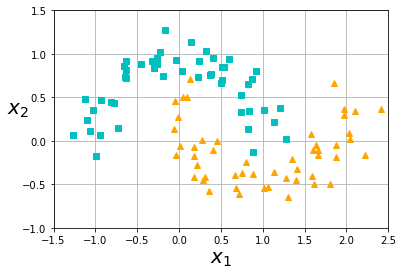

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### SVM con kernel lineal
Se define un pipeline para escalar los descriptores y posteriormente aplicar la clasificación con SVM

In [5]:
# Libreria liblinear
# from sklearn.svm import LinearSVC

pipe = Pipeline([
    ("escalar", StandardScaler()),
    ("svm_lineal", LinearSVC(C=10))
])

pipe.fit(X,y)

Pipeline(steps=[('escalar', StandardScaler()), ('svm_lineal', LinearSVC(C=10))])

#### Frontera de decisión

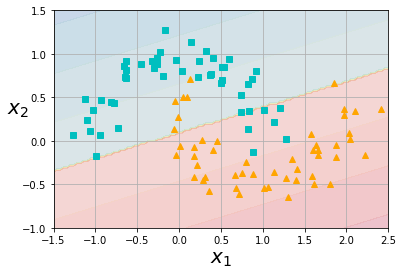

In [6]:
plot_predictions(pipe, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

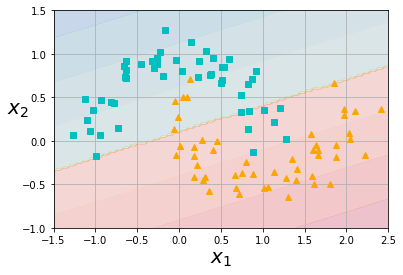

In [7]:
# Libreria libsvm
# from sklearn.svm import SVC

pipe = Pipeline([
    ("escalar", StandardScaler()),
    ("svm_lineal", SVC(C=10, kernel='linear'))
])

pipe.fit(X,y)

plot_predictions(pipe, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

A continuación se convierten los datos de forma no lineal para poder solucionar el problema. Se usa `sklearn.preprocessing.PolynomialFeatures` para usar una transformación polinomical cúbica.

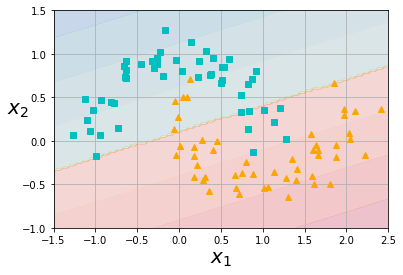

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Se usa de nuevo la libreria liblinear (que es mas rapida)

pipe = Pipeline([
    #("Trans_polinomial", PolynomialFeatures(degree=3)),
    ("escalar", StandardScaler()),
    ("svm_lineal", SVC(C=10, kernel='linear'))
])

pipe.fit(X,y)

plot_predictions(pipe, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Ahora se procede a realizar una clasificación no lineal similar a la anterior pero utilizando directamente SVM con kernel polinomial cúbico.

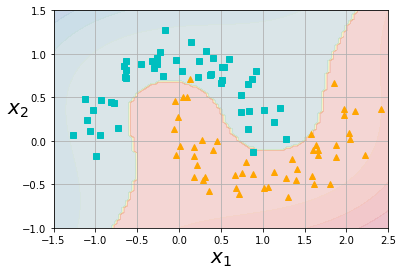

In [9]:
# Se usa de nuevo la libreria libsvm (que permite usar kernels)

pipe = Pipeline([
    ("escalar", StandardScaler()),
    ("svm_cubica", SVC(C=5, kernel='poly',degree=3, coef0=1))
])

pipe.fit(X,y)

plot_predictions(pipe, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Ahora una comparación con dos modelos con diferentes hiperparámetros para SVM con kernel polinomial. 

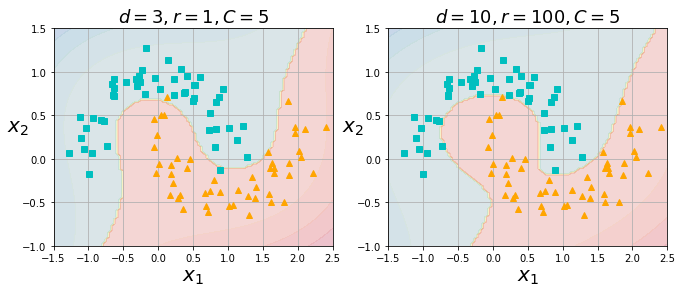

In [10]:
# **********Construccion de los modelos ***************************
# Modelo 1 con C = 5, d =3 y r = 1
poly_kernel_svm = Pipeline((
        ("escalar", StandardScaler()),
        ("svm_cubica", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))
poly_kernel_svm.fit(X, y)

# Modelo 1 con C = 10, d=10 y r = 5
poly100_kernel_svm = Pipeline((
        ("escalar", StandardScaler()),
        ("svm_cubica", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ))
poly100_kernel_svm.fit(X, y)

# ******* Graficas de las fronteras de decision para cada modelo *****
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

Ahora una clasificación usando SVM con kernel RBF (o Gaussiano)

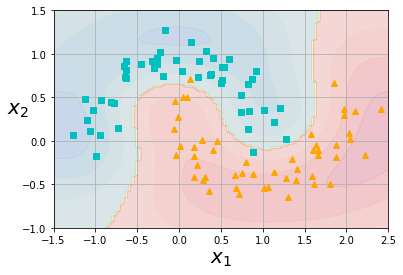

In [11]:
pipe = Pipeline([
    ("escalar", StandardScaler()),
    ("svm_rbf", SVC(C=10, kernel='rbf',gamma = 0.5))
])

pipe.fit(X,y)

plot_predictions(pipe, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Un ejemplo de SVM con kernel RBF variando los hiperparámetros:

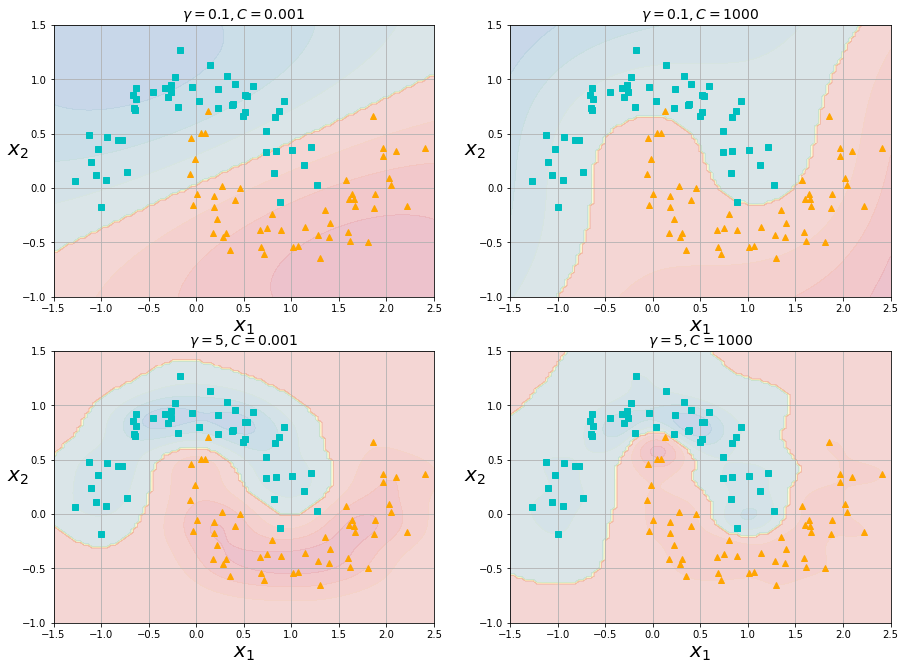

In [12]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hiper = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_s = []
for gamma, C in hiper:
    rbf_kernel_svm = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ))
    rbf_kernel_svm.fit(X, y)
    svm_s.append(rbf_kernel_svm)

plt.figure(figsize=(15, 11))

for i, svm in enumerate(svm_s):
    plt.subplot(221 + i)
    plot_predictions(svm, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hiper[i]
    plt.title("$\gamma = {}, C = {}$".format(gamma, C), fontsize=14)

plt.show()

## Ejemplos de SVR 

El algoritmo SVM es bastante versátil: no solo permite la clasificación lineal y no lineal, sino que también admite la regresión lineal y no lineal. El truco es invertir el objetivo: en lugar de intentar encontrar la mayor calle posible entre dos clases mientras se limitan las violaciones del margen, la Regresión SVM intenta ajustar tantos datos como sea posible en la calle y limitar las violaciones del margen (es decir, datos fuera de la calle). El ancho de la calle está controlado por un hiperparámetro ε (pero también existe el parámetro de regularización $C$). 

A continuación se generan datos lineales con un poco de ruido aleatorio, y se procede a realizar el ajuste SVR (usando liblinear en primer instancia).

In [13]:
# from sklearn.svm import LinearSVR

# Generando los datos
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Ajustando el modelo
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

Ahora se procedera a crear dos modelos diferentes y se creará una función para encontrar los vectores de soporte, puesto que la librería de *liblinear* no permite encontrarlos de forma directa (en cambio la librería *libsvm* sí). 

In [14]:
# Creacion de los modelos variando solo el hiperparametro de epsilon
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# Se define la funcion para encontrar los vectores de soporte
# con base en encontrar los datos que sobrepasen el presupuesto
# permitido (epsilon)
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

# Se encuentran los vectores de soporte
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

# Punto para crear una anotacion en una grafica posterior
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Ahora se procede a graficar la regresion, resaltando los vectores de soporte. No es necesario entender todo el código ahora mismo. Lo importante es el resultado de las gráficas.

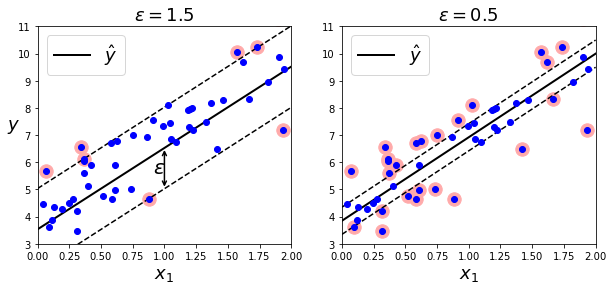

In [15]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Los vectores de soporte son los puntos que se encuentran rodeados por un donut de color rosa. Es claro, que en este caso (opuesto a SVM para clasificación), los vectores de soporte son todos aquellos datos que no están dentro del margen. Además, entre más grande $\epsilon$ más ancho es el margen.

A continuación se muestra otro ejemplo sencillo, generando datos cuadráticos con ruido aleatorio, ajustandolos usando `sklearn.svm.SVR` (librería *libsvm*). En este caso, los vectores de soporte se pueden encontrar directamente.

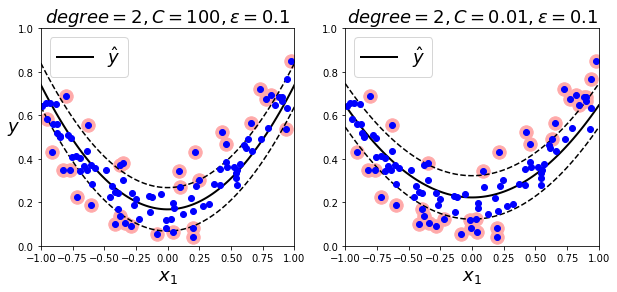

In [16]:
# from sklearn.svm import SVR

# Generacion de datos
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

# Ajustando los modelos
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

# Graficando los ajustes y ubicando los vectores de soporte
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

En este caso se ve como actua el parámetro de regularización $C$. Entre más pequeño el valor de $C$ existe una mayor regularización (el modelo es menos complejo, hay mayor cantidad de vectores de soporte).